<a href="https://colab.research.google.com/github/RiseAboveAll/PYTORCH_Learning/blob/master/Pytorch_FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

- Type of neural network : Feed Forward Neural Network



### **Forward Propogation**

  -  Different neurons find different features from the input

  -  Stack layers of neurons over layer

  -  Same inputs can be attached to multiple different neurons, each calculating something different

  -  Neurons of one layer can act as input to another layer, it increases depth and width of layer and network 

  -  A neuron : sigmoid(w.T . X + b)

  -  Multiple Neurons : Consider when you have multiple neurons in a layer, let say from 1 to M, Zj=sigmoid(wj.T . X + bj) for j=1 to M . It can also be written more effeciently as in vector form : if Zj=sigmoid(Wj.T . X + bj) for j=1 to M then Z=sigmoid(W.T . X + b). Where :
      
      -  z is a matrices of size M (M x 1)

      -  X is the vector of size D (Dx1) 

      -  W is the matrix of size D x M

      -  b is a vector of size M ( Mx1 )

      -  sigmoid() is an element wise multiplication









### **Activation Functions**



- Sigmoid Activation:
  
  -  Makes neural network non linear

  -  Issues with sigmoid activation function :

      -  **Standardization** : We want our inputs to have mean of 0 and std at 1 and hence in same scale . Problem with sigmoid is that output is centered between 0 and 1, i.e at .5. The output of the sigmoid layer is input to the next layer . If the output is centered around 0.5 hence there is no uniformity , which is not good as next layer would also want to see the standardized input, hence we want both the input and the output of the layer both to be standardized.

-  Hyperbolic Tangent(tanh) :

    -  It is centered at 0 

    -  It lies between -1 to 1 

    -  tanh(a) = (exp(2a) - 1)/(exp(2a) + 1)

    -  Issues with both **Sigmoid** & **Tanh** :

        -  Vanishing Gradient : We use gradient descent to train the model. Hence we calculate the gradient of the cost with respect to parameters. The issue comes with deeper neural network, gradients have to propogate backwards throughout the networks starting from the end. Output is made of bunch of composite function, which are ove non-linear functions , hence when we take the gradient or derivative of composite function , we get chain rule, hence composite function becomes multiplication in the derivative. Derivative of sigmoid and tanh are near to 0 at flatter regions on both side of the axis. Only in the center it is non zero, maximum value of derivative is 0.25. When we multiply the smaller gradients consecutively , we get very small values, hence gradients become very small as we go further back in depth of neural network. Hence the gradients will vanish. 


-  ReLu : 

    -  Partially Differentiable

    -  Values greater than 0 never have 0 gradient which makes training neural network lot more efficient. 

    -  ReLu does not have vanishing gradient as values less than equal 0 has already vanished. It is basically **Dead Neuron** . Dead Neurons are neurons which outputs always 0 because the weighted sum of its inputs are always less or equal 0. 

-  Leaky-Relu :

    -  Has Slope < 1 for values less than 0 

    -  Derivatives will always be positive 

-  ELU : 

    -  Higher speed of convergence

    -  Higher accuracy

    -  Allows outputs to be negative which goes back to the idea that mean of the values are close to 0 

-  Softplus:

    -  Taking log of the exponent, looks linear when the input is reasonably large. 

    -  For softplus and Relu minimum value is around 0 and maximum value is infinity , hence they are not centered around 0. 



**Something to try in activation function : BRU ( Bionodal Root Unit ) 

Code for fully Connected layer block : Sequential :

nn.Sequential(

  nn.Linear(D,M),

  nn.ReLU(),

  nn.Linear(M,K),

  nn.Softmax()

)



**Do not Use the above code**

Because pytorch combines the softmax function with the cross entropy loss (nn.CrossEntropyLoss) 

Code for multiclass Logistic Regression:

model=nn.Linear(D,K)

criterion=nn.CrossEntropyLoss()

**pytorch does have standalone categorical loss called NLL Loss*



### How to Represent Images 

**How Images are stored in Computer?**

-  Images have two properties :

    -  Height

    -  Width

-  It can be stored in form of **Matrix**, in an image matrix you store the color in form of pixel values. Colors comes in different channels like greyscale , RGB , etc. For eg : RGB, it is a set of 3 numbers , hence the matrix will have third dimension apart from height & width , it will be number of channels , i.e in case of RGB image , it is 3 , Hence it is an tensor of size (H,W,C). 

- **Quantization** : Physically color is light , measured by light intensity, hence it is continuous and has infinite possible values. But computers do not have infinite precision, hence in computers we have given each value as of 8 bits , i.e 2^8 = 256 possible values (0,1,2,....,255). Hence for 3 channels we have 2^8 * 2^8 * 2^8 = 16.8 million possible colors. Using this we can check how much space will an image consume. For example you hve 500 x 500 image , number of bits required = <code>500*500*3*8 = 6 million bits</code>. 

For images which are greyscale images, image can be either black or white or in between, it is a 2-D array(h,w), 0 represents **Black** & 255 represents **White**.

**Image As Inputs**

-  We do not use 8-bit valued image, neural network do not like a large scale values. Hence we scale images to have values between 0 and 1. 0 represents Black and 1 represent White in greyscale.  These are not standardized values as they are not centered around 0.  For images these values are convenient as these values can be represented as probabilities. 

<code>**Exception** VGG images are centered around 0 but the range is still 256.</code>

**Images as inputs to neural network**

-  Neural network expects input X to be of shape NxD, where <code> N is the number of samples</code> & <code> D is the number of Features</code>. An image can not have D features, it is 3-D object. Hence to represent the data set of images we would need to have a 4-D object of shape (N x H x W x C), where N is number of samples , H is height , W is width, C is number of channels. But when we are dealing with Fully Connected Dense Networks for images , we flatten the images by multiplying Height & Width hence shape is <code> (N , H*W*C) </code> . To do so we use <code> .view() </code> or <code> .reshape() </code> function. 

# Code Prepration - Fully Connected Network ( ANN ) 

- torchvision is the library which consist of datasets like MNIST



## Basic Concepts

#### Important Libraries

In [30]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import itertools

#### Loading Data

##### Train Dataset

In [2]:
train_dataset = torchvision.datasets.MNIST(root='.',train=True,download=True)
X_train = train_dataset.data
y_train = train_dataset.targets

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
X_train.shape

torch.Size([60000, 28, 28])

In [4]:
y_train.shape

torch.Size([60000])

##### Test Dataset

In [3]:
test_dataset = torchvision.datasets.MNIST(root='.',train=False,download=True)
X_test = test_dataset.data
y_test = test_dataset.targets

In [6]:
X_test.shape

torch.Size([10000, 28, 28])

In [7]:
y_test.shape

torch.Size([10000])

#### Transform

- To normalize the data divide the image array by 255

- Reshape the input array from N x H x W to N x D

In [4]:
x_train=X_train.reshape(-1,28*28)

In [9]:
x_train.shape

torch.Size([60000, 784])

In [5]:
x_test=X_test.reshape(-1,28*28)

In [11]:
x_test.shape

torch.Size([10000, 784])

### Model Building

**Mathematical Representation of Model**

y_hat = softmax(W2.T.a(W1.T * X + b1) + b2)

breaking this equation in steps : 



```
# Equational Representation of Steps of Model

a1=W1.T * X + b1

z1=A(a1)

a2=W2.T * z1 + b2

y_hat=softmax(a2) # This step is not needed in pytorch as it is already included in loss function 

# Code Representation of Steps of Model

model=nn.Sequential(
  #First Layer
  nn.Linear(784,128),
  nn.ReLU(),
  nn.Linear(128,10)
)

# **Reason for using 128 twice is what is the output of the first layer is the input to the second layer . nn.Linear(input_neurons,output_neurons)** 



```





**Train Model**

- We use batches of data because too large a data does not fit the memory. 

Hence we use batch gradient descent : 

Pseudo Code :

```
for epoch in range(epochs):
  for x_batch , y_batch in batches(X,y,batch_size=128):
    train(x_batch,y_batch) 

```

train() function will consist of :

  -  Zeroing the Gradient

  -  Calculating the Outputs for the batch

  -  Calculating the loss 

  -  Doing one step of Gradient Descent

  For batch gradient descent pytorch comes up with the DataLoader() class which comes with the batch size argument and acts as a generator over the dataset

```

from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size, shuffle=True)

```

*Batch Gradient Descent Loop* :

```

for it in range(n_epochs):

  for inputs , targets in train_loader:
  
    #Zero the parameter gradients

    optimizer.zero_grad()

```



**Evaluation**

-  You have to evaluate for the accuracy per batch, hence :

``` 

n_correct=0
n_total=0
for inputs,outputs in train_loader:
  #calculate output for this batch
  output=model(inputs)
  predictions=torch.max(output,1)
  ....
acc=n_correct/n_total



## Full Code

In [8]:
#Load Training Dataset post transformation
train_dataset= torchvision.datasets.MNIST(
    #Filepath to download data to
    root='.',
    #Set train = True to state function to return training dataset
    train=True,
    #Operation to do some preprocessing
    transform=transforms.ToTensor(),
    #Pytorch to download data
    download=True)


In [9]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

- It appears that tensor has 0's it is not evident that there is any other pixel value present in tensor

Let's check if there is any 

In [11]:
train_dataset.data.max().item()

255

- There present other pixel values also apart from 0's, this means that place where there is no object it's all black as 0's are there , and places where object or number value is there is some non black pixel values like 255

In [13]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [15]:
# Check unique target classes
train_dataset.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
#Test data loader from the data 
test_dataset=torchvision.datasets.MNIST(root='.',train=False,transform=transforms.ToTensor(),download=True)

In [17]:
#Build Model
model=nn.Sequential(
    nn.Linear(784,128),
    nn.LeakyReLU(),
    nn.Linear(128,10)
)


In [18]:
#Need to use GPU
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#transfers parameters of the model to the GPU
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [19]:
#Loss & Optimizer
#CrossEntropyLoss is used for multiple categories
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [22]:
#Data Loader
batch_size=128
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

- We notice that train_loader has shuffle as True where as test_loader has shuffle as False. It is because for training data if we loop through each sample in the same order each time, it will introduce unwanted correlation which hence will decrease performance! For test data we dont want to shuffle because we just want to evaluate the loss and accuracy



In [ ]:
#Check what does data loader do?
#maps value to (0,1)
#Make the data shape as [batch_size,channel,height,width]
tmp_loader=DataLoader(dataset=train_dataset,batch_size=1,shuffle=True)
for x,y in tmp_loader:
  print(x.shape)
  print(y.shape)

In [26]:
#Train the Model

n_epochs=10
#Stuff to store
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)
for it in range(n_epochs):
  train_loss=[]
  for inputs,targets in train_loader:
    #Move Data to GPU
    inputs,targets=inputs.to(device),targets.to(device)
    #Reshape Inputs
    inputs=inputs.view(-1,784)
    #Zero Parameter Gradient
    optimizer.zero_grad()
    #Forward Pass
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    #Backward & Optimize
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    #Get Train and Test Loss
  train_loss=np.mean(train_loss)
  test_loss=[]
  for inputs,targets in test_loader:
    #Move Data to GPU
    inputs,targets=inputs.to(device),targets.to(device)
    #Reshape Inputs
    inputs=inputs.view(-1,784)
    #Zero Parameter Gradient
    optimizer.zero_grad()
    #Forward Pass
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    test_loss.append(loss.item())
  test_loss=np.mean(test_loss)
  #Save Losses
  train_losses[it]=train_loss
  test_losses[it]=test_loss
  print(f'Epoch{it+1}/{n_epochs}, Train Loss : {train_loss : .4f}, Test Loss : {test_loss : .4f}')




Epoch1/10, Train Loss :  0.2007, Test Loss :  0.1629
Epoch2/10, Train Loss :  0.1444, Test Loss :  0.1313
Epoch3/10, Train Loss :  0.1112, Test Loss :  0.1057
Epoch4/10, Train Loss :  0.0905, Test Loss :  0.0997
Epoch5/10, Train Loss :  0.0747, Test Loss :  0.0897
Epoch6/10, Train Loss :  0.0639, Test Loss :  0.0815
Epoch7/10, Train Loss :  0.0539, Test Loss :  0.0781
Epoch8/10, Train Loss :  0.0458, Test Loss :  0.0782
Epoch9/10, Train Loss :  0.0395, Test Loss :  0.0760
Epoch10/10, Train Loss :  0.0335, Test Loss :  0.0780


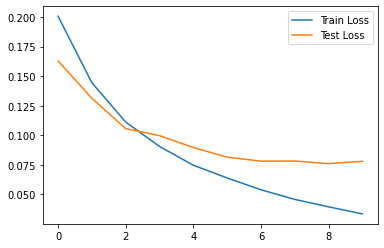

In [27]:
#Plot the train loss  and test loss per iteration

plt.plot(train_losses,label='Train Loss')
plt.plot(test_losses,label='Test Loss')
plt.legend()

In [29]:
#Calculate the accuracy
n_correct=0
n_total=0
for inputs,targets in train_loader:
  #Move Data to GPU Device
  inputs,targets=inputs.to(device),targets.to(device)
  #Reshape the inputs
  inputs=inputs.view(-1,784)
  #Forward Pass
  outputs=model(inputs)

  #Get Prediction
  #torch.max() returns both maximum value and argmax
  _,predictions=torch.max(outputs,1)
  #Update Counts
  n_correct+=(predictions==targets).sum().item()
  n_total+=targets.shape[0]
train_acc=n_correct/n_total

n_correct=0
n_total=0
for inputs,targets in test_loader:
  #Move Data to GPU Device
  inputs,targets=inputs.to(device),targets.to(device)
  #Reshape the inputs
  inputs=inputs.view(-1,784)
  #Forward Pass
  outputs=model(inputs)

  #Get Prediction
  #torch.max() returns both maximum value and argmax
  _,predictions=torch.max(outputs,1)
  #Update Counts
  n_correct+=(predictions==targets).sum().item()
  n_total+=targets.shape[0]
test_acc=n_correct/n_total
print(f'Train Acc : {train_acc : .4f}, Test Acc : {test_acc : .4f}')

Train Acc :  0.9930, Test Acc :  0.9772


In [ ]:
#Plot Confusion Matrix
from